In [3]:
# !pip install wordcloud
# from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import string
# from operator import attrgetter
# from collections import Counter, namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# !pip install pymorphy2 
# from pymorphy2 import MorphAnalyzer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# !pip install memory_profiler
from memory_profiler import memory_usage

!pip install rouge
from rouge import Rouge
import time


In [4]:
articles = pd.read_csv('/kaggle/input/russian-scientific-articles/lda_train.csv', delimiter=';')[:500]
articles = articles.drop(columns='id')
print(articles.shape)
articles.head(5)

(500, 3)


,title,cleaned,summarization
0,Концепция построения платформы для интеграции ...,Исторически на каждом предприятии сосуществуют...,Произведена формализация задачи интеграции про...
1,"Методы физической организации данных, поддержи...","В. В. дрождин, А. М. володин Пензенский госуда...",Рассматривается физическая организация баз дан...
2,Концепция фундаментализации образования в обла...,Фундаментализация образования в предметной обл...,Фундаментализация образования в предметной обл...
3,Эффективность параллельной реализации алгоритм...,"Осознание того факта, что компьютеры не в сост...",В статье рассматриваются особенности применени...
4,Педагогическая информатика как наука и учебная...,В статье предметная область педагогической инф...,В статье предметная область педагогической инф...


In [5]:
stopwords_ = set(stopwords.words('russian'))
stopwords_.update(['гг', 'xix', 'xx', 'хх', 'н', 'м', 'г', 'п', 'это', 'однако', 'таким', 'также', 'например', 'е', 'д', 'которого', "котором",
                   'которые', 'т', 'которых', 'именно', 'лишь', 'которая', 'этих', 'которой', 'поэтому', 'который','своего', 'своих', "другие",
                   'своей', "которое", 
                   "хотя", "либо", "те", "эта", "эти", "таких", "др", "л", "оно", "менее", "очень", "более", "р", "других",
                   "наиболее", "наименее", 'х'])

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])
def remove_symbols(text):
    return re.sub(r'[^а-яА-ЯёЁa-zA-Z\.,\s-]+', '', text)

# articles_ = articles.cleaned.apply(lambda text: text.lower())
# articles_ = articles_.apply(lambda text: remove_symbols(text))
# morph = MorphAnalyzer()
# articles_ = articles_.apply(lambda text: morph.parse(text)[0].normal_form)
# articles_ = articles_.apply(lambda text: remove_stopwords(text))

# text_ = ' '.join(articles_)

In [ ]:
counter_ = Counter(text_.split())
counter_.most_common(50)

In [ ]:
counter_ = Counter(text_.split())
counter_.most_common(50)

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color='white').generate(text_)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# plt.savefig('wordcloud.png')

In [6]:
articles.cleaned = articles.cleaned.apply(lambda text: text.lower())
articles['text'] = articles.cleaned 
articles.text = articles.text.apply(lambda t: remove_symbols(t))
articles.text = articles.text.apply(lambda x : re.sub(r'[\n\t]', ' ', x))
articles.text = articles.text.apply(lambda x : x.strip())
articles.text = articles.text.apply(lambda x : re.sub(r'[\[0-9\]]', '', x))
articles.text = articles.text.apply(lambda t: remove_stopwords(t))
articles.text.iloc[0]

'исторически каждом предприятии сосуществуют разнообразные информационные системы ис, зачастую функционируют независимо друг друга решают свой класс задач. многие производственные задачи решаются неэффективно решаются вовсе совместного использования данных сразу нескольких информационных систем, делает актуальной задачу интеграции ис данным. очевидно, актуальность задачи интеграции выше, выше уровень пользователей корпоративной системе управления, т. к. принятия решений масштабе предприятия большей вероятностью требуются данные разных подразделений, разных предметных областей и, следовательно, разных ис. решая проблему интеграции данных, it-отделы предприятий компании-подрядчики нередко идут очевидным путем, создавая частные интеграционные решения, налаживая обмен данными двумя конкретными системами. отрицать очевидную эффективность такого подхода части производительности обмена данными счет использования родных ис механизмов обмена, части стоимости создания такого решения. менее, очев

# SumBasic

In [5]:
!pip install -q sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.nlp.stemmers import Stemmer
# from sumy.utils import ItemsCount 

In [ ]:
from sumy.summarizers._summarizer import AbstractSummarizer

class SumBasicSummarizer(AbstractSummarizer):
        
    _stop_words = frozenset()
    _morph = MorphAnalyzer()

    @property
    def stop_words(self):
        return self._stop_words

    @stop_words.setter
    def stop_words(self, words):
        self._stop_words = frozenset(map(self.normalize_word, words))

    def __call__(self, document, sentences_count):
        sentences = document.sentences
        ratings = self._compute_ratings(sentences)
        return self._get_best_sentences(document.sentences, sentences_count, ratings)

    def _get_all_words_in_doc(self, sentences):
        return self._stem_words([w for s in sentences for w in s.words])

    def _get_content_words_in_sentence(self, sentence):
        normalized_words = self._normalize_words(sentence.words)
        normalized_content_words = self._filter_out_stop_words(normalized_words)
        stemmed_normalized_content_words = self._stem_words(normalized_content_words)
        stemmed_normalized_content_words = self._filter_out_stop_words(stemmed_normalized_content_words)
        return stemmed_normalized_content_words
    
    def _stem_word_ru(self, word):
        return self._morph.parse(word)[0].normal_form

    def _stem_words(self, words):
        return [self._stem_word_ru(w) for w in words]

    def _normalize_words(self, words):
        return [self.normalize_word(w) for w in words]

    def _filter_out_stop_words(self, words):
        return [w for w in words if w not in self.stop_words]

    @staticmethod
    def _compute_word_freq(list_of_words):
        word_freq = {}
        for w in list_of_words:
            word_freq[w] = word_freq.get(w, 0) + 1
        return word_freq

    def _get_all_content_words_in_doc(self, sentences):
        all_words = self._get_all_words_in_doc(sentences)
        content_words = self._filter_out_stop_words(all_words)
        normalized_content_words = self._normalize_words(content_words)
        return normalized_content_words

    def _compute_tf(self, sentences):
       
        content_words = self._get_all_content_words_in_doc(sentences)
        content_words_count = len(content_words)
        content_words_freq = self._compute_word_freq(content_words)
        content_word_tf = dict((k, v / content_words_count) for (k, v) in content_words_freq.items())
        return content_word_tf

    @staticmethod
    def _compute_average_probability_of_words(word_freq_in_doc, content_words_in_sentence):
        content_words_count = len(content_words_in_sentence)
        if content_words_count > 0:
            word_freq_sum = sum([word_freq_in_doc[w] for w in content_words_in_sentence])
            word_freq_avg = word_freq_sum / content_words_count
            return word_freq_avg
        else:
            return 0

    @staticmethod
    def _update_tf(word_freq, words_to_update):
        for w in words_to_update:
            word_freq[w] *= word_freq[w]
        return word_freq

    def _find_index_of_best_sentence(self, word_freq, sentences_as_words):
        min_possible_freq = -1
        max_value = min_possible_freq
        best_sentence_index = 0
        for i, words in enumerate(sentences_as_words):
            word_freq_avg = self._compute_average_probability_of_words(word_freq, words)
            if word_freq_avg > max_value:
                max_value = word_freq_avg
                best_sentence_index = i
        return best_sentence_index

    def _compute_ratings(self, sentences):
        word_freq = self._compute_tf(sentences)
        ratings = {}

        # make it a list so that it can be modified
        sentences_list = list(sentences)

        # get all content words once for efficiency
        sentences_as_words = [self._get_content_words_in_sentence(s) for s in sentences]

        # Removes one sentence per iteration by adding to summary
        while len(sentences_list) > 0:
            best_sentence_index = self._find_index_of_best_sentence(word_freq, sentences_as_words)
            best_sentence = sentences_list.pop(best_sentence_index)

            # value is the iteration in which it was removed multiplied by -1 so that the first sentences removed (the most important) have highest values
            ratings[best_sentence] = -len(ratings)

            # update probabilities
            best_sentence_words = sentences_as_words.pop(best_sentence_index)
            self._update_tf(word_freq, best_sentence_words)

        return ratings

In [9]:
startSumBasic1 = time.time()
stemmer = Stemmer('english')
summarizer = SumBasicSummarizer(stemmer)
summarizer.stop_words = stopwords_
parser = PlaintextParser.from_string(articles.text.iloc[0], Tokenizer('english'))
text_mas = [str(sentence) for sentence in summarizer(parser.document, 5)]
endSumBasic1 = time.time() - startSumBasic1
print(endSumBasic1)

0.128007173538208


In [ ]:
startSumBasic = time.time()
stemmer = Stemmer('english')
summarizer = SumBasicSummarizer(stemmer)
summarizer.stop_words = stopwords_
def SumBasic_annotation(text, sent_count = 5):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    text_mas = [str(sentence) for sentence in summarizer(parser.document, sent_count)]
    return ' '.join(text_mas)
    
articles['sumbasic_annotation'] = articles.text.apply(lambda x: SumBasic_annotation(x))
endSumBasic = time.time() - startSumBasic
print(endSumBasic / 60)
memory_usage()

In [10]:
rouge = Rouge()
def get_rouge(summar, new_annot):
    scores = rouge.get_scores(summar.lower(), new_annot)
    r, p, f = 0, 0, 0
    for i in scores[0].values():
        r += i['r']
        p += i['p']
        f += i['f']
    return (r/3, p/3, f/3)

In [ ]:
# get_rouge(0, 'sumbasic_annotation')
articles['sumbasic_rouge'] = articles.apply(lambda x: get_rouge(x.summarization, x.sumbasic_annotation), axis=1)

In [ ]:
articles.head()

In [11]:
def get_mean_scores(col_name):
    r = articles[col_name].apply(lambda x: x[0]).mean()
    p = articles[col_name].apply(lambda x: x[1]).mean()
    f = articles[col_name].apply(lambda x: x[2]).mean()
    return (r, p, f)

In [12]:
def plot_rouge(col_name):
    fig, ax = plt.subplots(1,3, figsize=(10,5))
    
    sns.boxplot(ax=ax[0], y=articles[col_name].apply(lambda x: x[0]))
    ax[0].set_title('Rouge')
    
    sns.boxplot(ax=ax[1], y=articles[col_name].apply(lambda x: x[1]))
    ax[1].set_title('P')
    
    sns.boxplot(ax=ax[2], y=articles[col_name].apply(lambda x: x[2]))
    ax[2].set_title('R')
    
    fig.tight_layout()
    fig.show()

In [ ]:
get_mean_scores('sumbasic_rouge')

In [ ]:
plot_rouge('sumbasic_rouge')

In [ ]:
 articles.summarization.iloc[0]

In [ ]:
'. '.join([i.strip().capitalize() for i in articles.sumbasic_annotation.iloc[0].split('.')])

# TextRank

In [12]:
# !pip install -q pytextrank
# !pip install -q spacy
!python -m spacy download ru_core_news_md
import pytextrank
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 5.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [14]:
startTextRank1 = time.time()
ru_nlp = spacy.load('ru_core_news_md')
ru_nlp.add_pipe('textrank')
doc = ru_nlp(articles.text.iloc[0])
tr = doc._.textrank
a =  ' '.join([str(i) for i in tr.summary(limit_sentences=5)])
endTextRank1 = time.time() - startTextRank1
print(endTextRank1)

4.491102933883667


In [ ]:
startTextRank = time.time()
ru_nlp = spacy.load('ru_core_news_md')
ru_nlp.add_pipe('textrank')

def TextRank_annotation(t, sent_count=5):
    doc = ru_nlp(t)
    tr = doc._.textrank
    return ' '.join([str(i) for i in tr.summary(limit_sentences=sent_count)])
        
articles['textrank_annotation'] = articles.text.apply(lambda x: TextRank_annotation(x))
endTextRank = time.time() - startTextRank
print(endTextRank / 60)
memory_usage()

In [ ]:
articles.textrank_annotation.iloc[0]

In [ ]:
articles['textrank_rouge'] = articles.apply(lambda x: get_rouge(x.summarization, x.textrank_annotation), axis=1)
get_mean_scores('textrank_rouge')

In [ ]:
plot_rouge('textrank_rouge')

# **Bert**

In [7]:
!pip install torch
!pip install transformers
import torch
from transformers import AutoTokenizer, BertForTokenClassification

In [16]:
model_name = "IlyaGusev/rubert_ext_sum_gazeta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sep_token = tokenizer.sep_token
sep_token_id = tokenizer.sep_token_id

model_extr = BertForTokenClassification.from_pretrained(model_name)

In [17]:
def Bert_annotation(article_text, model=model_extr):
    sentences = [s for s in sent_tokenize(article_text)]
    article_text = sep_token.join(sentences)

    inputs = tokenizer(
        [article_text],
        max_length = 500,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )
    sep_mask = inputs["input_ids"][0] == sep_token_id

    current_token_type_id = 0 
    for pos, input_id in enumerate(inputs["input_ids"][0]):
        inputs["token_type_ids"][0][pos] = current_token_type_id
        if input_id == sep_token_id:
            current_token_type_id = 1 - current_token_type_id
    with torch.no_grad(): 
        outputs = model(**inputs) 
    logits = outputs.logits[0, :, 1]
 
    logits = logits[sep_mask]
    logits, indices = logits.sort(descending=True)
    logits, indices = logits.cpu().tolist(), indices.cpu().tolist()
    pairs = list(zip(logits, indices))
    pairs = pairs[:3]
    indices = list(sorted([idx for _, idx in pairs]))
    summary = " ".join([sentences[idx] for idx in indices])
    return summary

In [19]:
startBert1 = time.time()
b = Bert_annotation(articles.text.iloc[0])
endBert1 = time.time() - startBert1
print(endBert1)

1.0601441860198975


In [16]:
startBert = time.time()
articles['bert_annotation'] = articles.text.apply(lambda x: Bert_annotation(x))
endBert = time.time() - startBert
print(endBert / 60)
memory_usage()

21.516415111223857


[1718.7421875]

In [17]:
articles['bert_rouge'] = articles.apply(lambda x: get_rouge(x.summarization, x.bert_annotation), axis=1)
get_mean_scores('bert_rouge')

(0.3716140038842013, 0.29162525673037937, 0.3013881140622799)

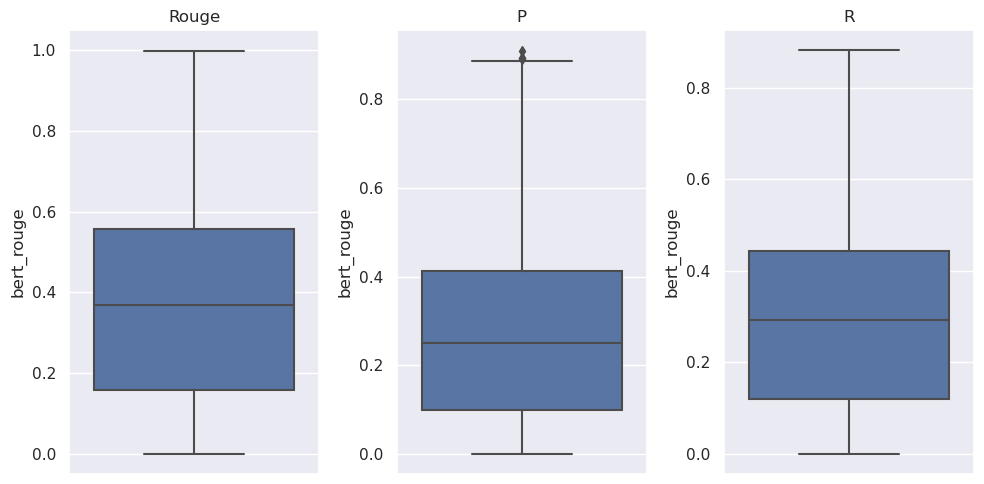

In [20]:
plot_rouge('bert_rouge')

In [18]:
articles.bert_annotation.iloc[0]

'многие производственные задачи решаются неэффективно решаются вовсе совместного использования данных сразу нескольких информационных систем, делает актуальной задачу интеграции ис данным. существуют унифицированные подходы решению задачи интеграции данных уровне компании, - использование, называемых интеграционных платформ. данная работа посвящена разработке концепции создания интеграционной платформы предприятий нефтегазовой отрасли.'

# **Bart**

In [8]:
from transformers import MBartTokenizer, MBartForConditionalGeneration

model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
model_abstr = MBartForConditionalGeneration.from_pretrained(model_name)

In [9]:
def Bart_annotation(article_text, model=model_abstr):
    input_ids = tokenizer(
        [article_text],
        max_length=500,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )["input_ids"]

    output_ids = model.generate(
        input_ids=input_ids,
        min_length=200,
        max_length=550,
        no_repeat_ngram_size=4
    )[0]

    summary = tokenizer.decode(output_ids, skip_special_tokens=True)
    return summary

In [10]:
startBart1 = time.time()
d = Bart_annotation(articles.text.iloc[1], model_abstr)
endBart1 = time.time() - startBart1
print(endBart1)

91.01739263534546


In [33]:
startBart = time.time()
articles['bart_annotation'] = articles.text.apply(lambda x: Bart_annotation(x))
endBart = time.time() - startBart
print(endBart / 60)
memory_usage()

665.5407777786255


[9888.01171875]

In [34]:
articles['bart_rouge'] = articles.apply(lambda x: get_rouge(x.summarization, x.bart_annotation), axis=1)
get_mean_scores('bart_rouge')

(0.1569464622622295, 0.2652901218625068, 0.18494491244165703)

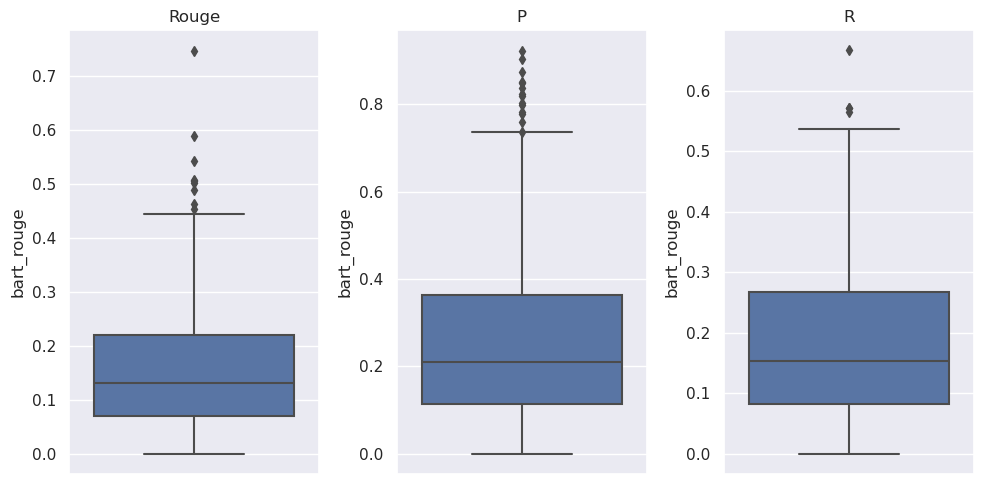

In [35]:
plot_rouge('bart_rouge')

In [36]:
articles.bart_annotation.iloc[0]

'В сегодняшнем обзоре мы рассмотрим наиболее популярные подходы к решению задачи интеграции данных в корпоративную информационную среду, в том числе в нефтегазовой отрасле, а также рассмотрим, какие платформы можно использовать для создания универсальных интеграционных решений в нефтегазовом секторе и какие из них можно использовать в качестве альтернативы традиционным решениям интеграции данных в IT-отрасль. Эксперты отмечают, что интеграция данных в корпоративной информационной среде является одним из важнейших инструментов повышения производительности работы в современных условиях, а также отраслевые шаблоны интеграции в нефтегазовых отраслевых системах, в частности в ИТ-отраслях нефтегазовой отрасли. Наибольшей популярностью популярностью пользуются интеграционные платформы платформы в нефтегазового сегмента, например, ibm websphere, microsoft biztalk и ibmwebsphere.'

In [11]:
time_for_one = [0.128007173538208, 4.491102933883667, 1.0601441860198975, 91.01739263534546]
algs_name = ['SumBasic', 'TextRank', 'BertSumExt', 'Bart']

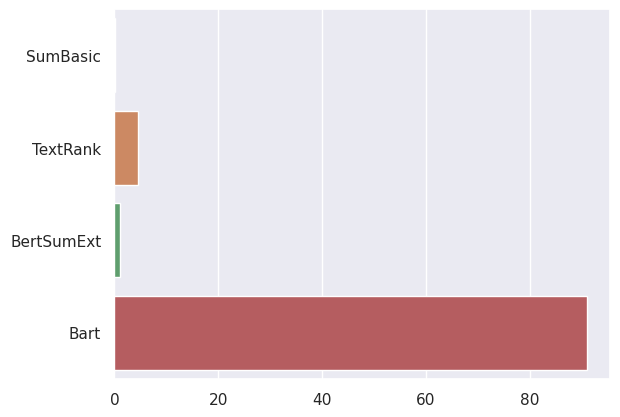

In [19]:
sns.barplot(y=algs_name, x=time_for_one)
plt.show()